# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [2]:
import numpy as np
import pandas as pd
import random

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [5]:
temp = pd.read_csv("../your-code/Temp_States.csv")

#### Print `temp`

In [6]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
type(temp)

pandas.core.frame.DataFrame

In [11]:
temp.value_counts()

City        State        Temperature
Albany      New York     9.444444       1
Bridgeport  Connecticut  14.444444      1
Buffalo     New York     3.333333       1
Hartford    Connecticut  17.222222      1
NYC         New York     19.444444      1
Newark      New Jersey   20.000000      1
Treton      New Jersey   22.222222      1
dtype: int64

#### Select the rows where state is New York

In [20]:
temp_NY = temp['State'] == 'New York'
NY = temp[temp_NY]
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [21]:
NY.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [22]:
temp_ab15 = temp['Temperature'] > 15
AB15 = temp[temp_ab15]
AB15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [23]:
AB15.City

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [25]:
temp_ai1520 = AB15['Temperature'] < 20
A_1520 = AB15[temp_ai1520]
A_1520

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

### New York

#### New York mean

In [26]:
NY.Temperature.mean()

10.74074074074074

#### New York standart deviation

In [29]:
NY.Temperature.std()

8.133404168888054

### Connecticut

In [27]:
temp_connec = temp['State'] == 'Connecticut'
Connec = temp[temp_connec]
Connec

,City,State,Temperature
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Connecticut mean

In [30]:
Connec.Temperature.mean()

15.833333333333332

#### Connecticut standart deviation

In [31]:
Connec.Temperature.std()

1.9641855032959645

### New Jersey

In [28]:
temp_NJ = temp['State'] == 'New Jersey'
NJ = temp[temp_NJ]
NJ

,City,State,Temperature
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### New Jersey mean

In [32]:
NJ.Temperature.mean()

21.11111111111111

#### New Jersey standart deviation

In [33]:
NJ.Temperature.std()

1.5713484026367717

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [36]:
employee = pd.read_csv("../your-code/employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [40]:
type(employee)

pandas.core.frame.DataFrame

In [41]:
employee.keys()

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

In [38]:
employee.value_counts()

Name    Department  Education  Gender  Title      Years  Salary
Ana     HR          Master     F       VP         8      70        1
Carlos  IT          Master     M       VP         8      70        1
David   HR          Master     M       analyst    2      30        1
Eva     Sales       Bachelor   F       associate  2      55        1
Jose    IT          Bachelor   M       analyst    1      35        1
Maria   IT          Master     F       analyst    2      30        1
Pedro   IT          Phd        M       associate  7      60        1
Samuel  Sales       Master     M       associate  3      55        1
Sonia   HR          Bachelor   F       analyst    4      35        1
dtype: int64

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [104]:
agrupad_name = employee.groupby('Name')

In [102]:
sns.countplot(x=employee.Name, y=employee.Salary)

ValueError: Cannot pass values for both `x` and `y`

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

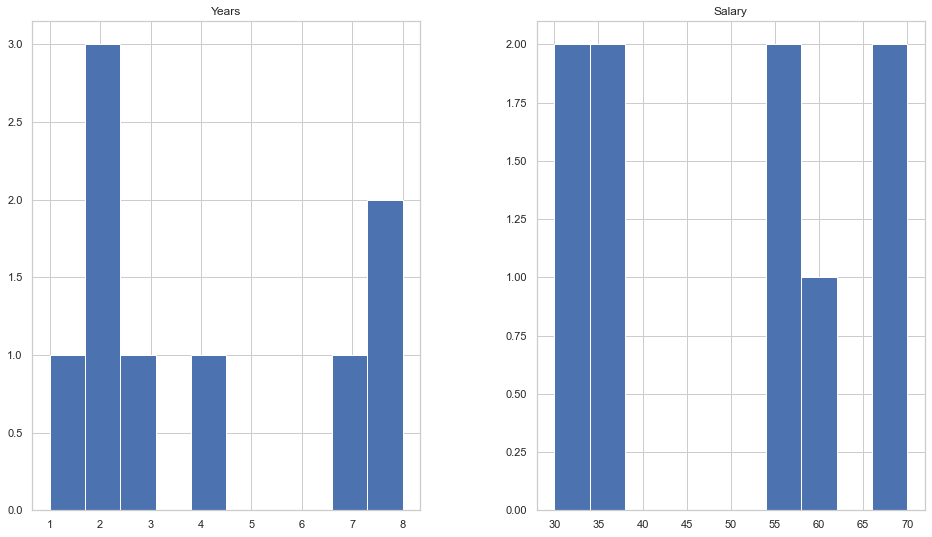

In [55]:
employee.hist() 

In [54]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### What's the average salary in this company?

In [56]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [57]:
employee.Salary.max()

70

#### What's the lowest salary?

In [58]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [59]:
low_sal = employee['Salary'] == employee.Salary.min()
sal_min = employee[low_sal]
sal_min

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [76]:
Dav = sal_min.loc[[2]]
Dav

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [78]:
Dav.Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [79]:
onl_as = employee['Title'] == "associate"
associates = employee[onl_as]
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [85]:
# your answer here- 1 method
first3 = employee.loc[[0,1,2]]
first3

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [84]:
# your answer here- 2nd method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [86]:
# Ya he definido antes un DataFrame llamado associates
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


In [91]:
associates_rich = associates['Salary'] > 55
assoc_rich = associates[associates_rich]
assoc_rich

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [94]:
employee.groupby('Years').mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [95]:
employee.groupby('Title').mean('Salary')

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

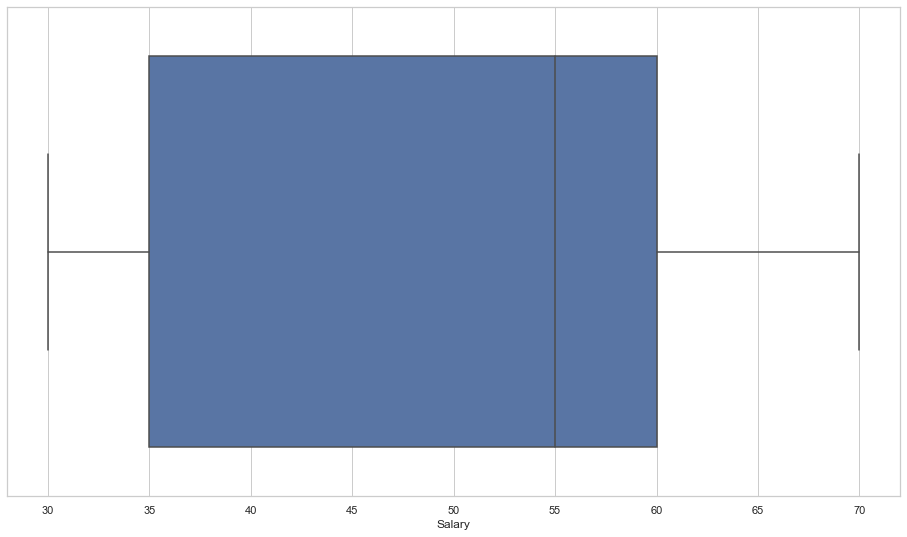

In [140]:
sns.boxplot(x = 'Salary', data = employee)

In [105]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

In [106]:
# print third quartile here
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [112]:
employee.groupby('Gender').mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


The mean salary is different but it is because of the years in the company.

In [116]:
F = 47.5/4
M = 50/4.2
F == M

False

In [117]:
47.5/4

11.875

In [118]:
50/4.2

11.904761904761905

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [114]:
employee.groupby('Department').mean('Salary')

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [97]:
employee.groupby('Department').min('Salary')

,Years,Salary
Department,,
HR,2,30
IT,1,30
Sales,2,55


In [98]:
employee.groupby('Department').max('Salary')

,Years,Salary
Department,,
HR,8,70
IT,8,70
Sales,3,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [120]:
orders = pd.read_csv("../your-code/Orders.zip")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [121]:
type(orders)

pandas.core.frame.DataFrame

In [122]:
orders.keys()

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

In [125]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


####  What is the average Purchase Price?

In [126]:
orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [129]:
orders.amount_spent.max()

168469.6

In [128]:
orders.amount_spent.min()

0.0

#### Select all the customers we have in Spain

In [145]:
Sp_cust = orders['Country'] == "Spain"
Spain_c = orders[Sp_cust]
Spain_c.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [132]:
Spain_c.value_counts()

Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                      Quantity  InvoiceDate          UnitPrice  CustomerID  Country  amount_spent
6421        536944     22383      2010  12     5    12    lunch bag suki  design           70        2010-12-03 12:20:00  1.65       12557       Spain    115.50          1
347861      567340     21164      2011  9      1    15    home sweet home metal sign       6         2011-09-19 15:02:00  2.95       12540       Spain    17.70           1
347854      567340     21172      2011  9      1    15    party metal sign                 12        2011-09-19 15:02:00  1.45       12540       Spain    17.40           1
347855      567340     22176      2011  9      1    15    blue owl soft toy                12        2011-09-19 15:02:00  2.95       12540       Spain    35.40           1
347856      567340     23393      2011  9      1    15    home sweet home cushion cover    8         2011-09-19 15:02:00  3.75       12540       

#### Select all the customers who have bought more than 50 items ?

In [144]:
cust50 = orders['Quantity'] > 50
cust_50 = orders[cust50]
cust_50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [143]:
Sp_50 = cust_50['Country'] == "Spain"
Sp50 = cust_50[Sp_50]
Sp50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [142]:
free_o = orders['UnitPrice'] == 0
free = orders[free_o]
free.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [146]:
orders[orders.Description.str.contains('lunch bag')].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [147]:
orders[(orders['year'] == 2011) & (orders.Description.str.contains('lunch bag'))].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

<function matplotlib.pyplot.show(close=None, block=None)>

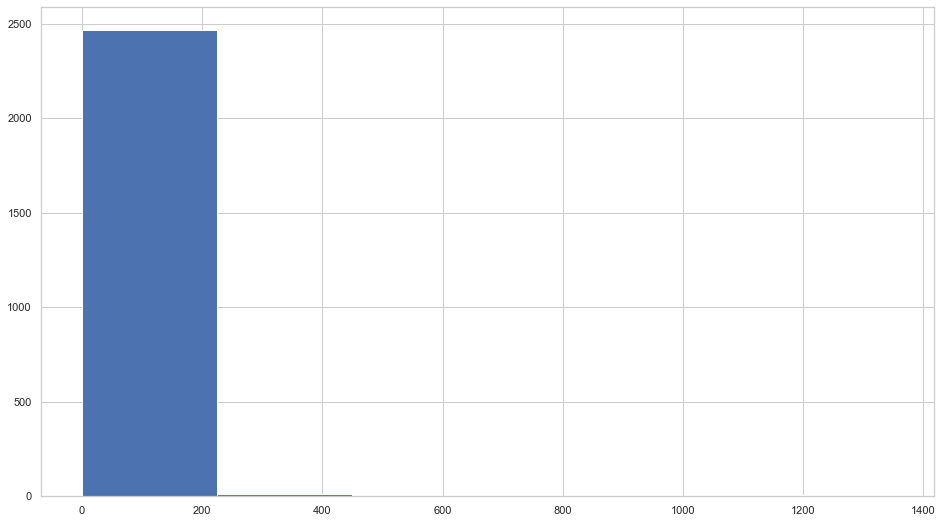

In [149]:
plt.hist(Spain_c['amount_spent'], bins=6)
plt.show

#### Select all orders made in the month of August

In [150]:
august = orders['month'] == 8
aug = orders[august]
aug.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [151]:
aug.groupby('Country').agg({'Quantity': 'count'})

,Quantity
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [152]:
orders.groupby('Country').agg({'amount_spent': 'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [157]:
exp = orders['UnitPrice'] == orders['UnitPrice'].max()
xp = orders[exp]
xp

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [158]:
orders.groupby('year').agg({'amount_spent': 'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
